In [392]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#matplotlib imports
import matplotlib.pyplot as plt
from pylab import bone, pcolor, colorbar, plot, show

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#minisom imports
from minisom import MiniSom


In [393]:
#Read the data
data = pd.read_csv('../data/StartUpsESG_0602.csv')
data = data[['StartUp','Country','Raised','ESG', 'E', 'S', 'G']]
data

,StartUp,Country,Raised,ESG,E,S,G
0,VenusEnergy,Lithuania,5986183.0,0.010,0.008,0.002,0.000
1,GreenEnergyCoin,Netherlands,0.0,0.018,0.010,0.006,0.002
2,HydroMiner,Austria,3500000.0,0.014,0.010,0.000,0.004
3,PowerCorp,"Hong Kong SAR, China",0.0,0.008,0.006,0.000,0.002
4,Emyron Coin,United States,0.0,0.017,0.000,0.011,0.006
...,...,...,...,...,...,...,...
6536,SUPP Network,United States,0.0,0.000,0.000,0.000,0.000
6537,Thousand Token,Colombia,0.0,0.000,0.000,0.000,0.000
6538,Cryptocurrency Market,Spain,0.0,0.000,0.000,0.000,0.000
6539,IQ Token,Belarus,0.0,0.000,0.000,0.000,0.000


In [394]:
X = data.drop(['StartUp', 'Country'], axis=1)
Y = data[['StartUp', 'Country']]
X

,Raised,ESG,E,S,G
0,5986183.0,0.010,0.008,0.002,0.000
1,0.0,0.018,0.010,0.006,0.002
2,3500000.0,0.014,0.010,0.000,0.004
3,0.0,0.008,0.006,0.000,0.002
4,0.0,0.017,0.000,0.011,0.006
...,...,...,...,...,...
6536,0.0,0.000,0.000,0.000,0.000
6537,0.0,0.000,0.000,0.000,0.000
6538,0.0,0.000,0.000,0.000,0.000
6539,0.0,0.000,0.000,0.000,0.000


In [395]:
X_labeled = pd.DataFrame(X, columns = ['Raised', 'ESG', 'E', 'S', 'G'])
sc = MinMaxScaler(feature_range = (0,1))
sc.fit(X)
X=sc.transform(X)

In [396]:
som_shape = (2, 2)
som = MiniSom(som_shape[0], som_shape[1], 5, sigma=.5, learning_rate=0.5)# , neighborhood_function='gaussian', random_seed=10)
som.random_weights_init(X)
som.train(data = X, num_iteration=5000, verbose=True)


 [ 2800 / 5000 ]  56% - 0:00:00 left 

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.013709474173961868


In [397]:

winner_coordinates = np.array([som.winner(x) for x in X]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
cluster_index.shape

(6541,)

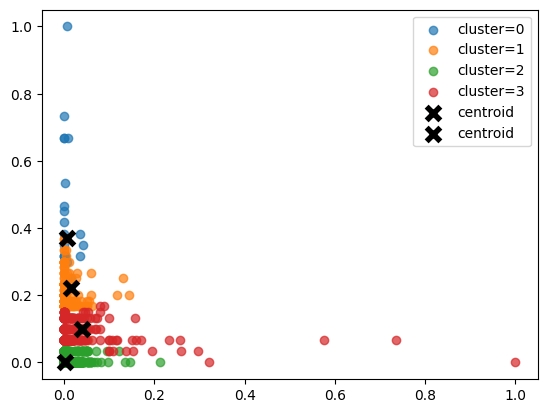

In [398]:
import matplotlib.pyplot as plt

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids of the clusters
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=8, linewidths=14, color='k', label='centroid')
plt.legend()

In [399]:
trace1 = go.Scatter(
                    x = X[cluster_index == 0, 0],
                    y = X[cluster_index == 0, 1],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

trace2 = go.Scatter(
                    x = X[cluster_index == 1, 0],
                    y = X[cluster_index == 1, 1],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

trace3 = go.Scatter(
                    x = X[cluster_index == 2, 0],
                    y = X[cluster_index == 2, 1],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter(
                    x = X[cluster_index == 3, 0],
                    y = X[cluster_index == 3, 1],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(100, 10, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4]

layout = dict(title = 'Clusters',
                yaxis = dict(zeroline = False),
                xaxis = dict(zeroline = False)
                 )

fig = dict(data = data, layout = layout)
iplot(fig)

In [400]:
data = pd.concat([Y, X_labeled], axis=1)

In [401]:
ESG_max = (data[cluster_index == 0]['ESG'].max(), data[cluster_index == 1]['ESG'].max(), data[cluster_index == 2]['ESG'].max(), data[cluster_index == 3]['ESG'].max())
ESG_max

(0.06, 0.022, 0.004, 0.01)

In [402]:
ESG_min = (data[cluster_index == 0]['ESG'].min(), data[cluster_index == 1]['ESG'].min(), data[cluster_index == 2]['ESG'].min(), data[cluster_index == 3]['ESG'].min())
ESG_min

(0.012, 0.004, 0.0, 0.0)

In [403]:
ESG_esc_avg = (X[cluster_index == 0, 0].mean(axis=0), X[cluster_index == 1, 0].mean(axis=0), X[cluster_index == 2, 0].mean(axis=0), X[cluster_index == 3, 0].mean(axis=0))
ESG_esc_avg

(0.006678682956521741,
 0.01004429188275862,
 0.0026086870045127597,
 0.018572146612359553)

In [404]:
Raised_avg = (X[cluster_index == 0, 1].mean(axis=0), X[cluster_index == 1, 1].mean(axis=0), X[cluster_index == 2, 1].mean(axis=0), X[cluster_index == 3, 1].mean(axis=0))
Raised_avg

(0.42608695652173906,
 0.21149425287356324,
 0.0013073014785636812,
 0.09247815230961298)